对表3-6中的数值进行分析。

In [1]:
%pylab inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("tb3_6.csv")

展示数据：
- BP表示商业部门所有人的每小时产出
- NBP表示非农商业部门所有人的每小时产出
- BS表示商业部门真实小时工资
- NBS表示非农商业部门真实小时工资

这里将1992年的指数作为100，时间范围涉及1960-2005年
之后将这些数据展示出来，可见商业部门和非农商业部门的每小时产出与真实小时工资都基本上相符（表现为红色与绿色曲线比较接近）

In [3]:
df.head()

,year,BP,NBP,BS,NBS
0,1960,48.9,51.9,13.9,14.5
1,1961,50.6,53.5,14.4,15.0
2,1962,52.9,55.9,15.1,15.6
3,1963,55.0,57.8,15.6,16.1
4,1964,56.8,59.6,16.2,16.6


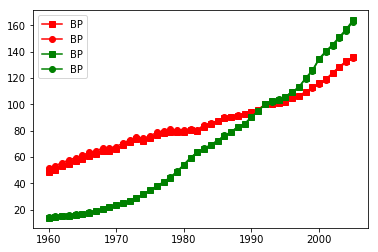

In [6]:
plt.plot(df['year'], df['BP'], 'rs-', df['year'], df['NBP'], 'ro-', df['year'], df['BS'], 'gs-', df['year'], df['NBS'], 'go-')
legend()

下面估算商业部门每小时产出与真实小时工资间的变量依存关系：

In [7]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

C:\Users\bangu_000\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [9]:
modB = sm.OLS(df['BS'], df['BP'])

In [10]:
resB = modB.fit()

In [11]:
print resB.summary()

                            OLS Regression Results                            
Dep. Variable:                     BS   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     380.3
Date:                Sun, 18 Jun 2017   Prob (F-statistic):           1.40e-23
Time:                        20:01:03   Log-Likelihood:                -216.70
No. Observations:                  46   AIC:                             435.4
Df Residuals:                      45   BIC:                             437.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
BP             0.8789      0.045     19.502      0.0

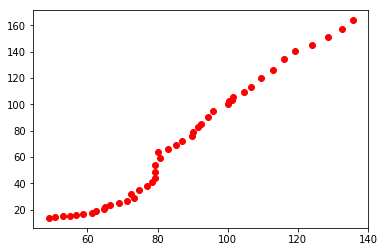

In [12]:
plt.plot(df['BP'], df['BS'], 'ro')

$r^2 = 0.894$，可见基本是符合线性关系的
同样的方法可用来估算非农商业部门间每小时产出与真实工资间的线性关系：

In [13]:
modNB = sm.OLS(df['NBS'], df['NBP'])
resNB = modNB.fit()

In [14]:
print resNB.summary()

                            OLS Regression Results                            
Dep. Variable:                    NBS   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     355.5
Date:                Sun, 18 Jun 2017   Prob (F-statistic):           5.46e-23
Time:                        20:06:11   Log-Likelihood:                -217.99
No. Observations:                  46   AIC:                             438.0
Df Residuals:                      45   BIC:                             439.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
NBP            0.8667      0.046     18.854      0.0

$r^2 = 0.888$，基本上和商业部门相当。

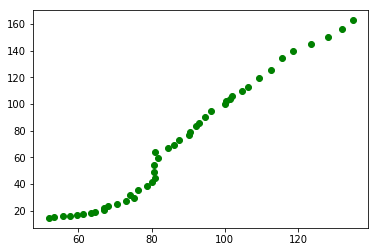

In [15]:
plt.plot(df['NBP'], df['NBS'], 'go')